In [2]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
%matplotlib inline
from pandas.plotting import parallel_coordinates
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.datasets import load_breast_cancer
from time import time
from sklearn import metrics


In [3]:

# define the size of the outout graph in later
size = (10, 6)
data_set = load_breast_cancer(as_frame=True)


X = data_set.data
y = data_set.target


X.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
print(min(y),
      max(y))

0 1


<AxesSubplot:>

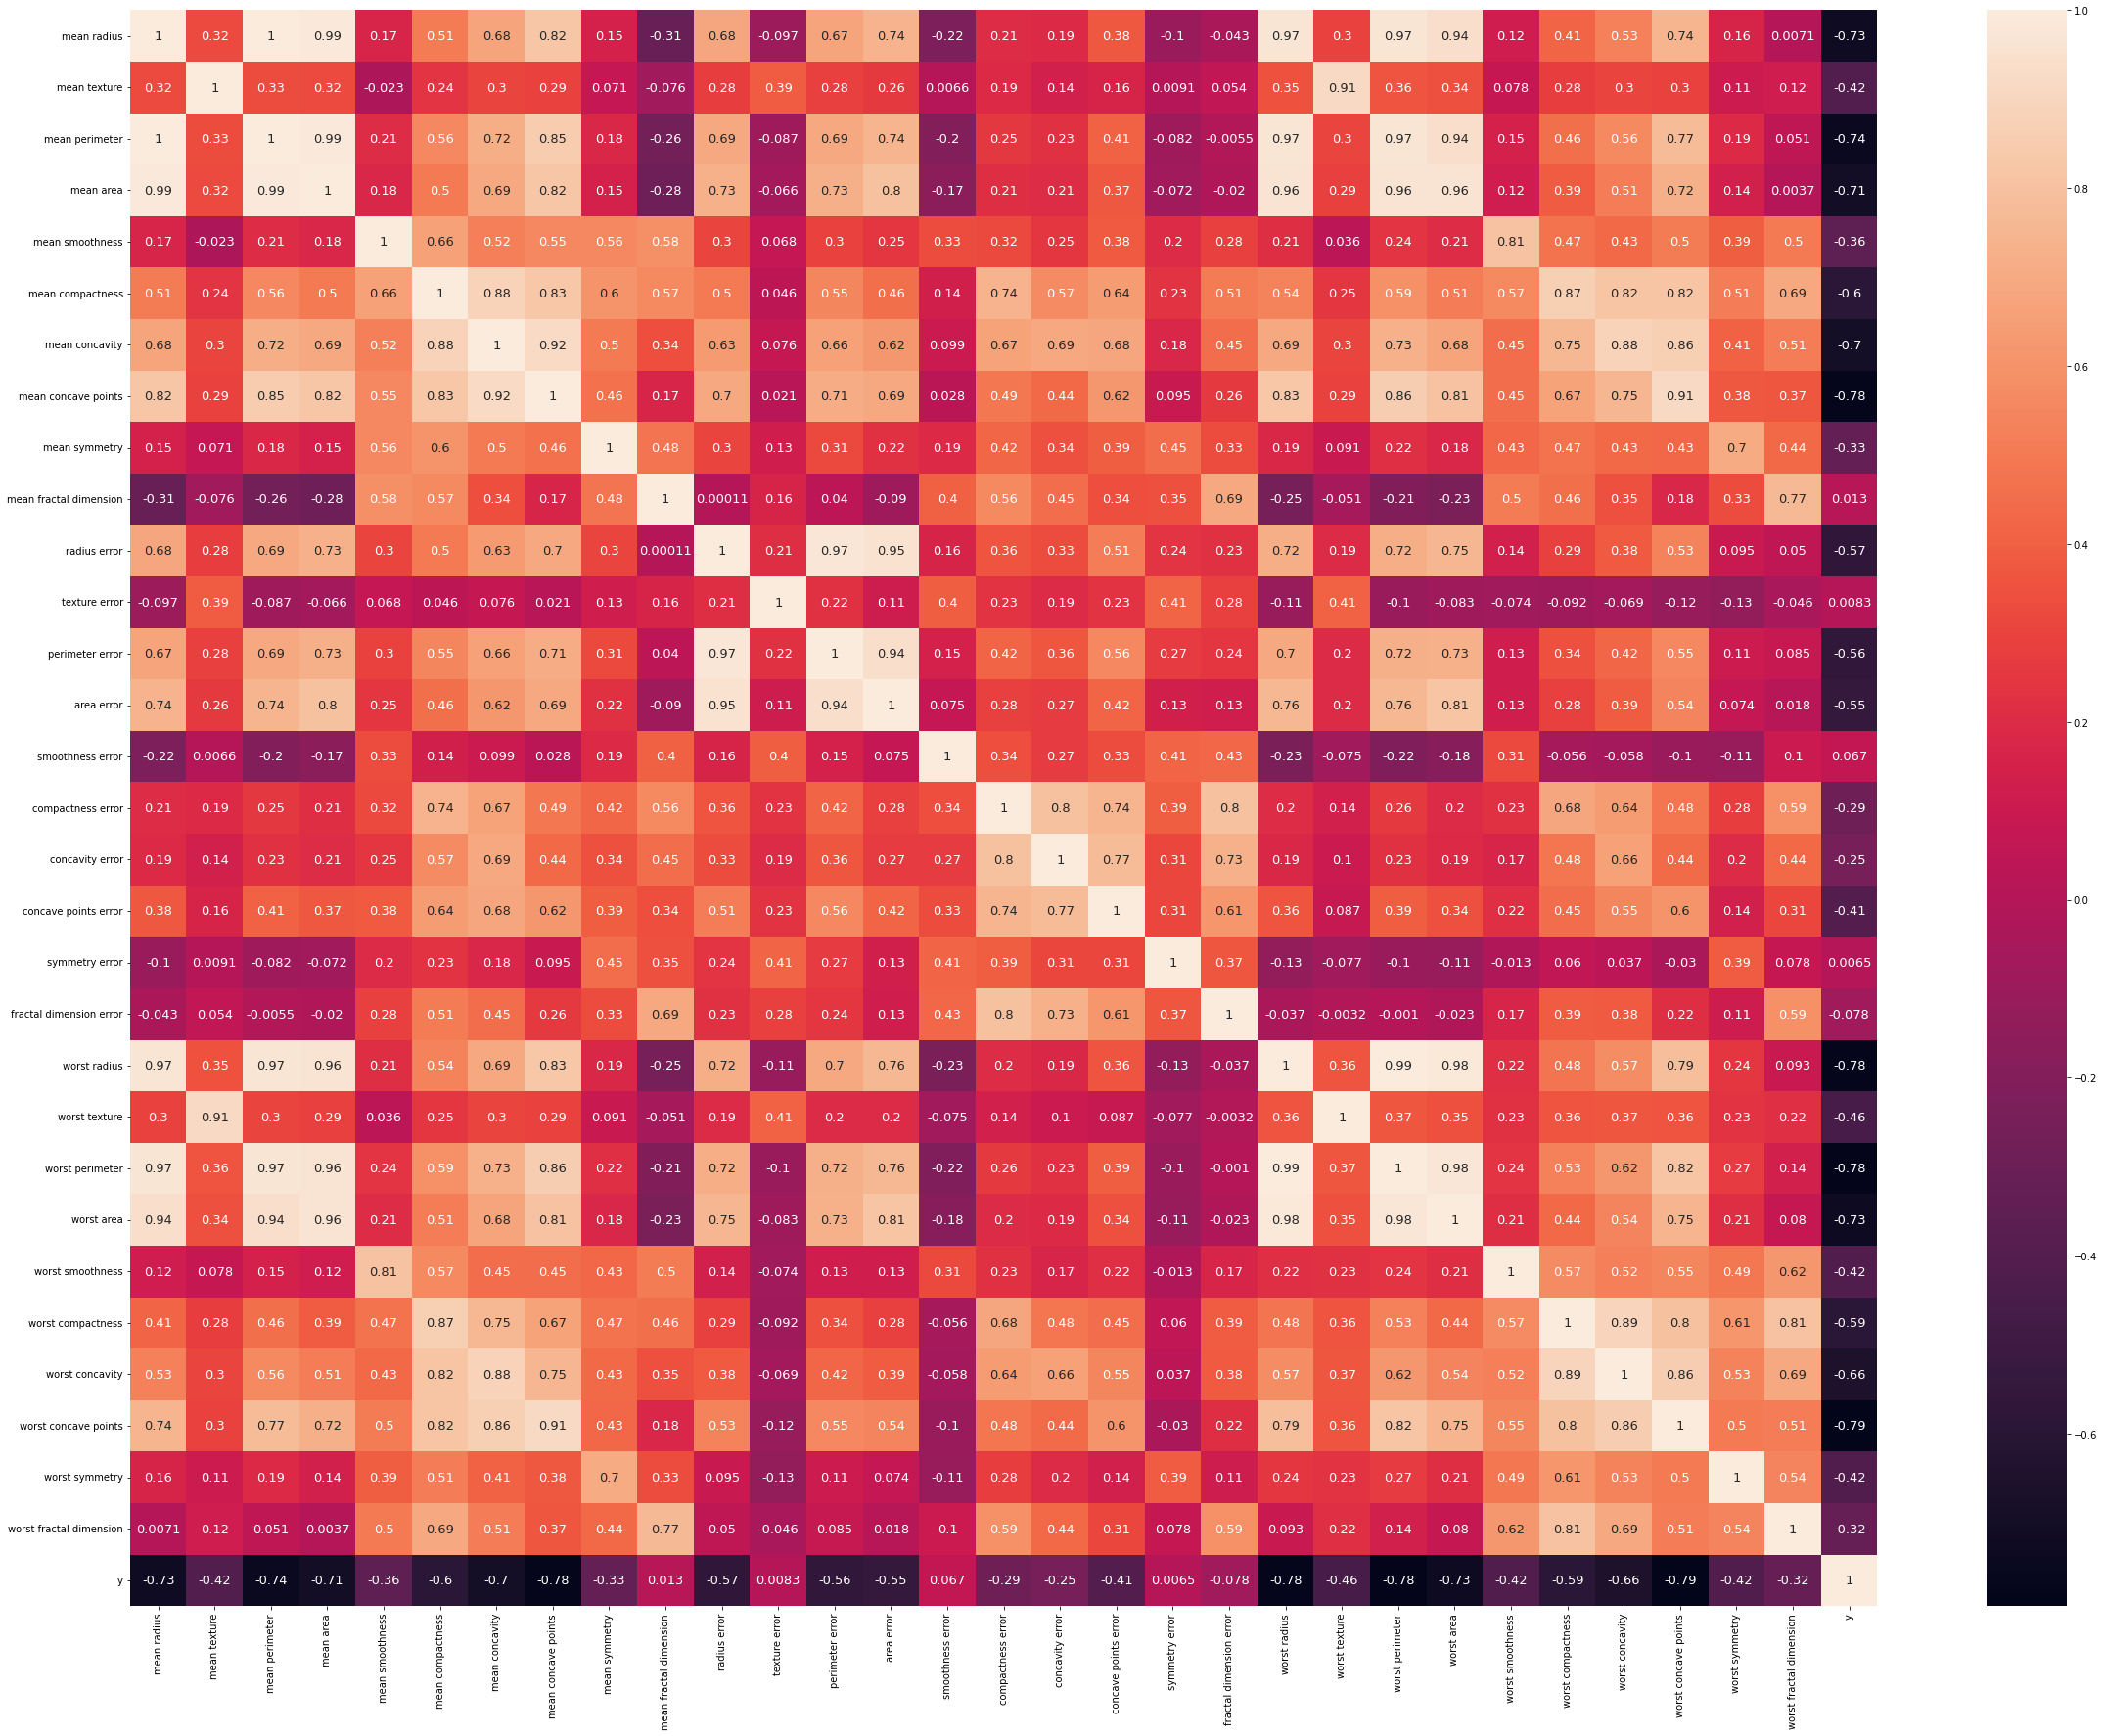

In [5]:
data = X
data['y'] = y
corrmat = data.corr()

fig, ax = plt.subplots(figsize=(40, 30))
sns.heatmap(corrmat, annot=True, annot_kws={'size': 13})

In [6]:
clustering_steps = [
                    ("standard_scaler", StandardScaler()),
                    ("kmeans", KMeans(n_clusters=2))
                   ]

clustering_pipeline = Pipeline(clustering_steps, verbose=True)
clustering_pipeline


Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=2))],
         verbose=True)

In [7]:
def bench_k_means(estimator, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator.fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]




    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (name + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=name, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    # print("For n_clusters =", name,
    #       "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(name):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / name)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # # 2nd Plot showing the actual clusters formed
    # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
    #             c=colors, edgecolor='k')

    # # Labeling the clusters
    # centers = clusterer.cluster_centers_
    # # Draw white circles at cluster centers
    # ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #             c="white", alpha=1, s=200, edgecolor='k')

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                 s=50, edgecolor='k')

    # ax2.set_title("The visualization of the clustered data.")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % name),
                 fontsize=14, fontweight='bold')





    
    # Show the results
    formatter_result = (
        "{:}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

    return estimator, results

In [8]:
silhouette_avg_n_clusters = []

__________________________________________________________________________________
k	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
2	0.033s	11768	0.621	0.649	0.635	0.736	0.635	0.503
3	0.047s	10279	0.575	0.409	0.478	0.572	0.477	0.235
4	0.052s	9418	0.748	0.463	0.572	0.684	0.570	0.152
5	0.047s	8696	0.731	0.338	0.462	0.387	0.460	0.041
6	0.047s	8081	0.758	0.322	0.452	0.350	0.450	-0.024
7	0.071s	7650	0.768	0.283	0.414	0.276	0.411	-0.052
8	0.063s	7263	0.762	0.277	0.406	0.265	0.403	-0.032
9	0.067s	7038	0.860	0.292	0.436	0.274	0.433	-0.055
10	0.049s	6745	0.887	0.284	0.430	0.235	0.426	-0.079
15	0.074s	5785	0.891	0.241	0.379	0.162	0.374	-0.195
20	0.094s	5213	0.905	0.218	0.351	0.123	0.344	-0.235
30	0.114s	4487	0.896	0.193	0.317	0.086	0.307	-0.281
50	0.147s	3579	0.991	0.185	0.312	0.057	0.295	-0.511
__________________________________________________________________________________


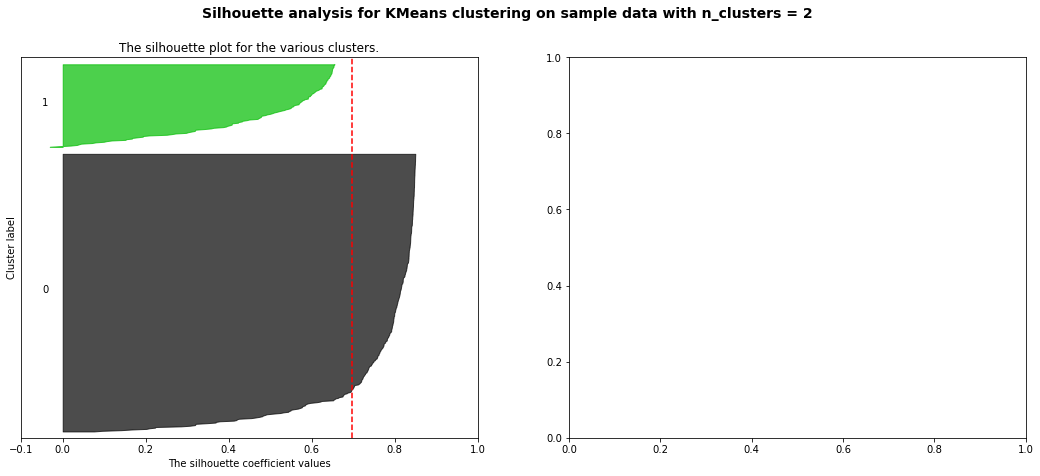

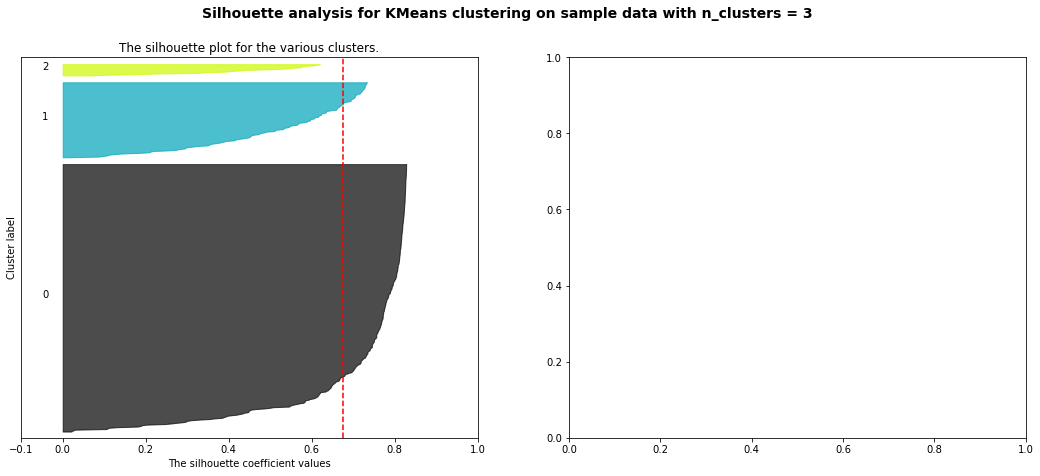

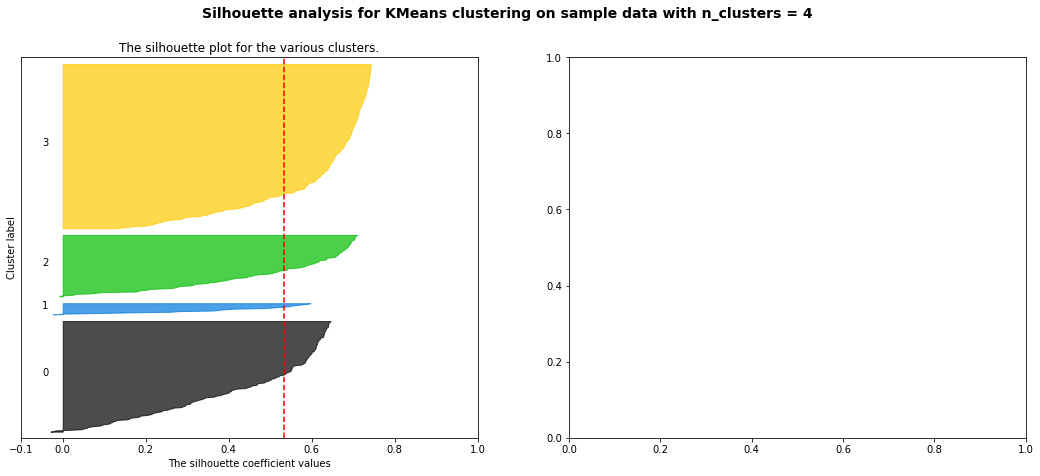

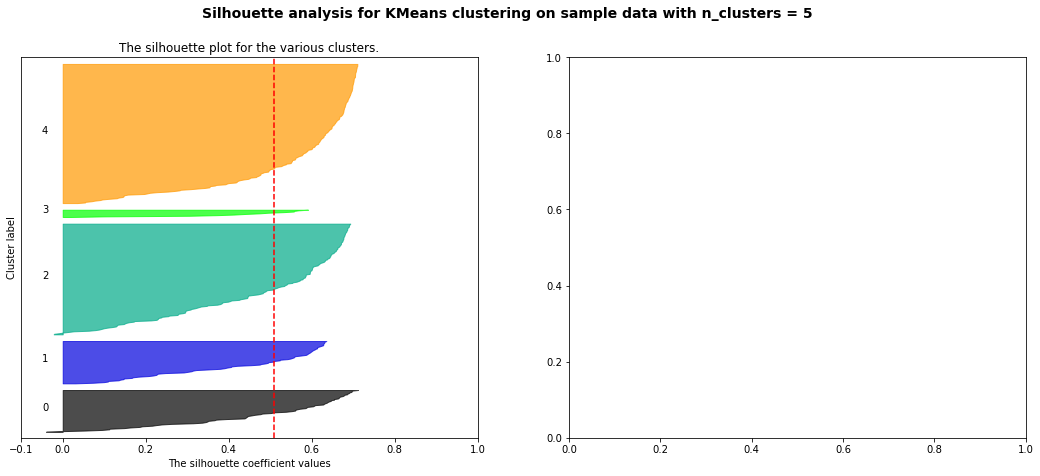

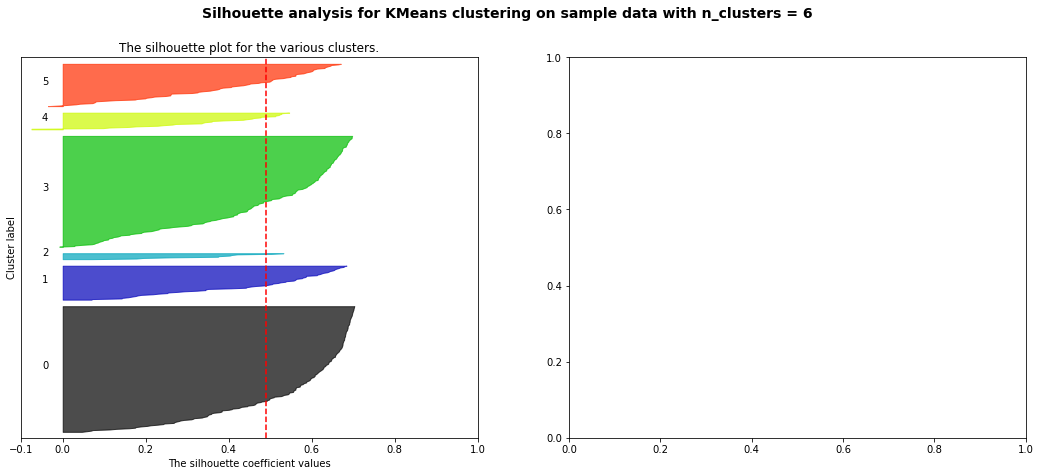

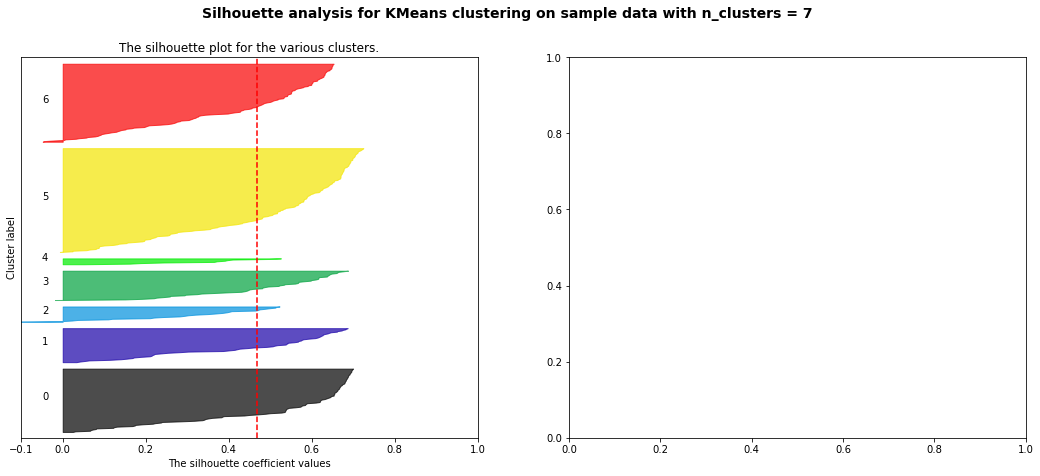

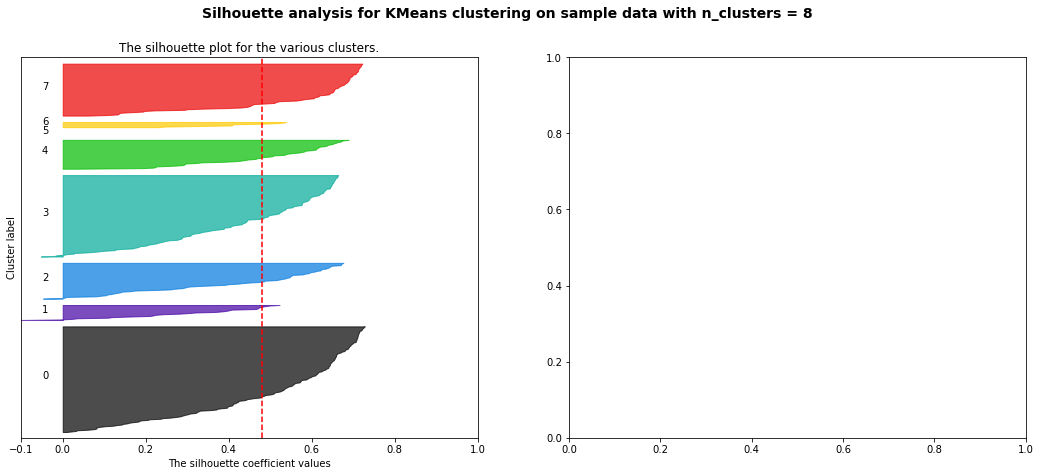

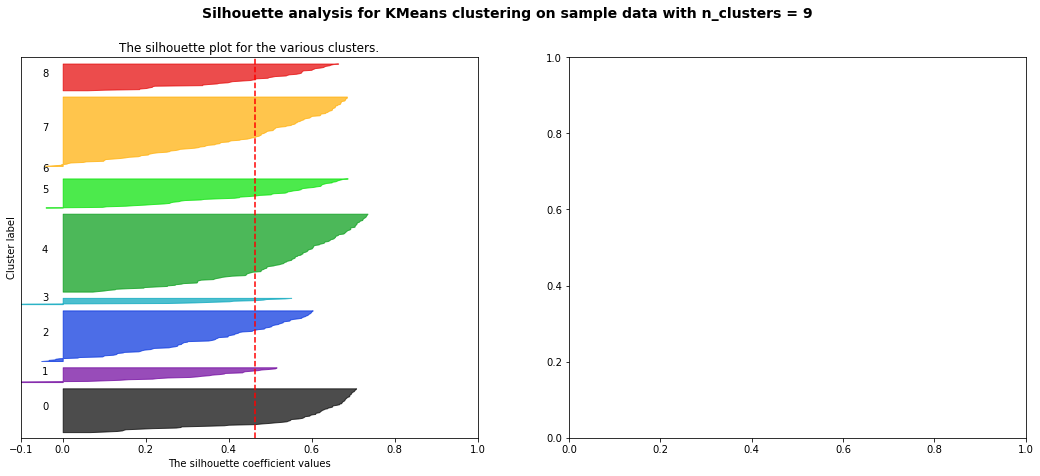

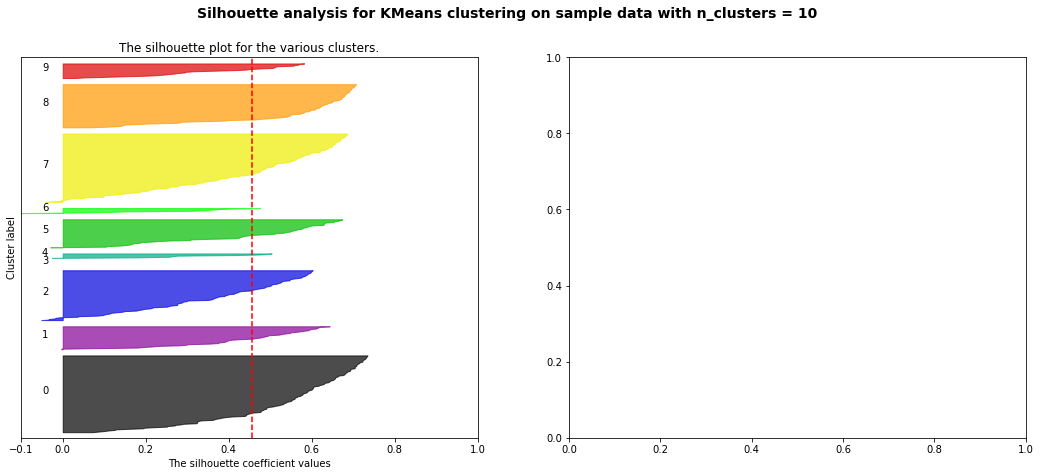

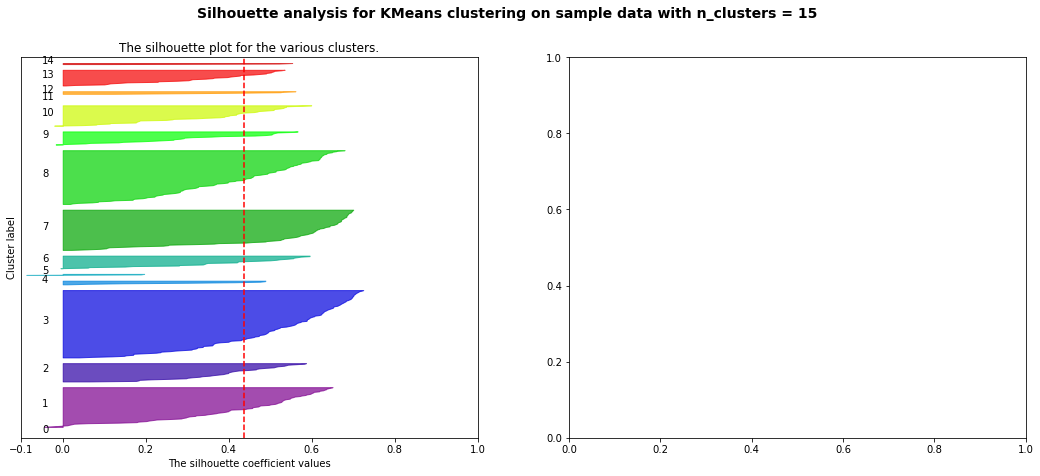

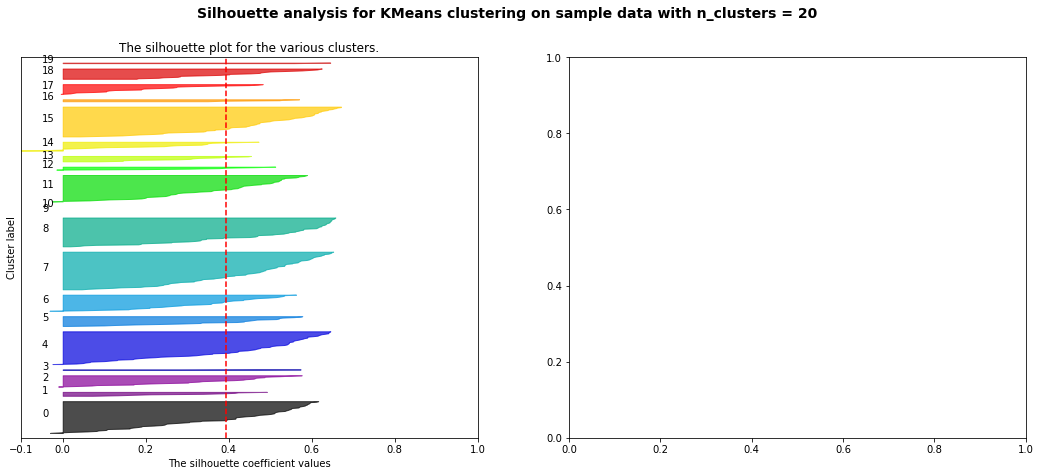

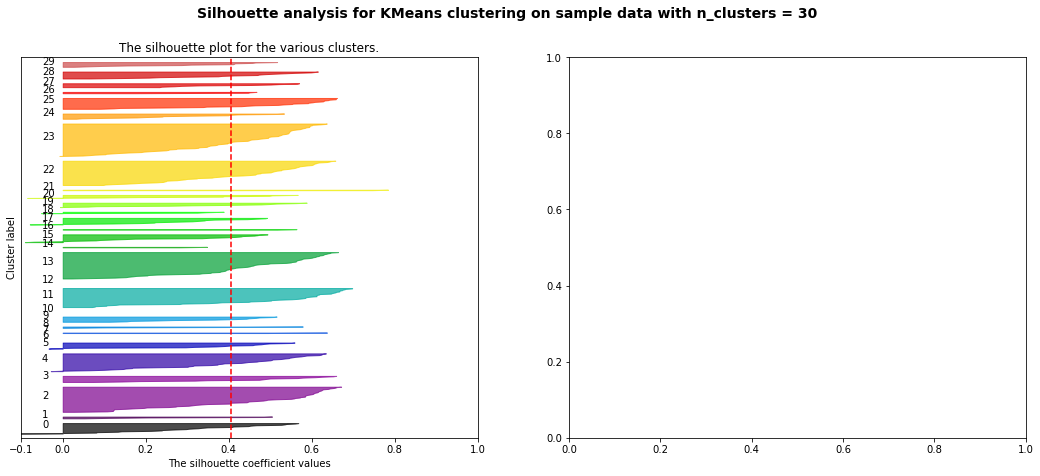

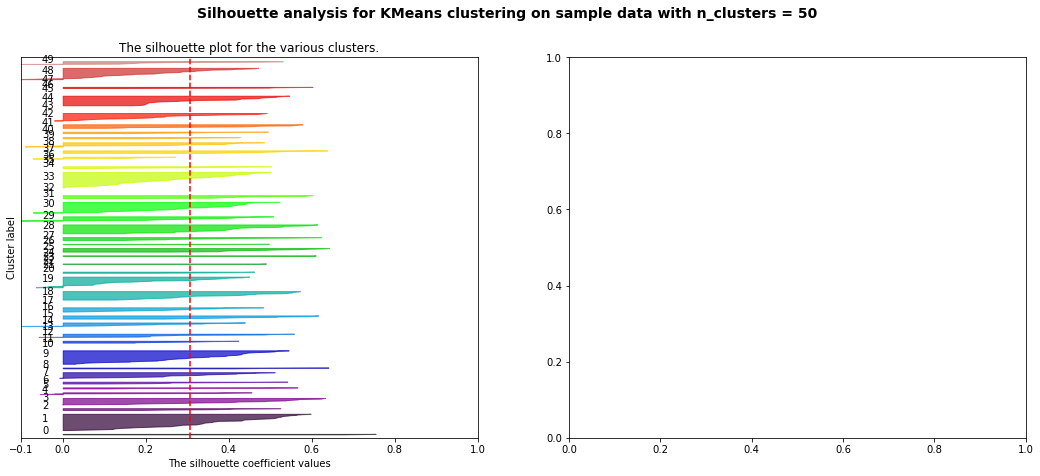

In [9]:
ks = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 50]
estimators = []
res = []
labels = ["k", "time", "inertia", "homo", "compl", "v-meas", "ARI", "AMI", "silhouette"]

print(82 * "_")
print("k\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
for k in ks:
    clustering_steps = [
        ("standard_scaler", StandardScaler()),
        ("kmeans", KMeans(n_clusters=k))
    ]
    estimator, result = bench_k_means(Pipeline(clustering_steps, verbose=False), k, X, y)
    estimators.append(estimator)
    res.append(result)
    # print(result)

print(82 * "_")

In [10]:
res = np.array(res).T
print(res.shape)
res[0]

(9, 13)


array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 15., 20., 30., 50.])

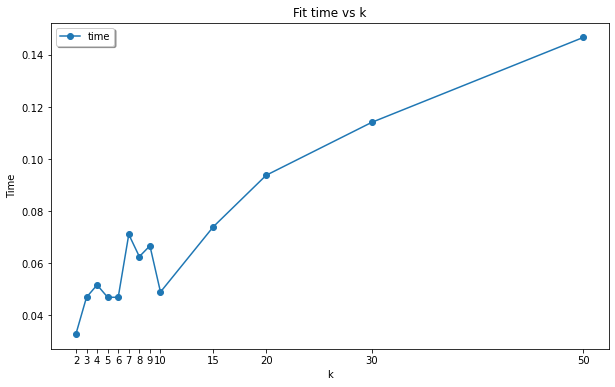

In [11]:
# fit time
fig, g = plt.subplots(1, 1, figsize=size)
plt.xticks(ks, ks)
g.set_title("Fit time vs k")
g.set_ylabel('Time')
g.set_xlabel('k')
g.plot(ks, res[1], marker='o', label=labels[1])
g.legend(shadow=True, fancybox=True)

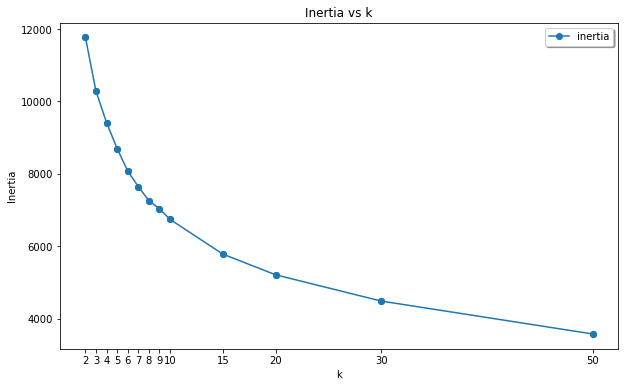

In [12]:
# inertia
fig, g = plt.subplots(1, 1, figsize=size)
plt.xticks(ks, ks)
g.set_title("Inertia vs k")
g.set_ylabel('Inertia')
g.set_xlabel('k')
g.scatter(ks, res[2])
g.plot(ks, res[2], marker='o', label=labels[2])
g.legend(shadow=True, fancybox=True)

[ 0.50301191  0.23532577  0.15239869  0.04107159 -0.02423802 -0.05171273
 -0.03230376 -0.05473554 -0.0793948  -0.19459738 -0.23465798 -0.28128132
 -0.51140911]


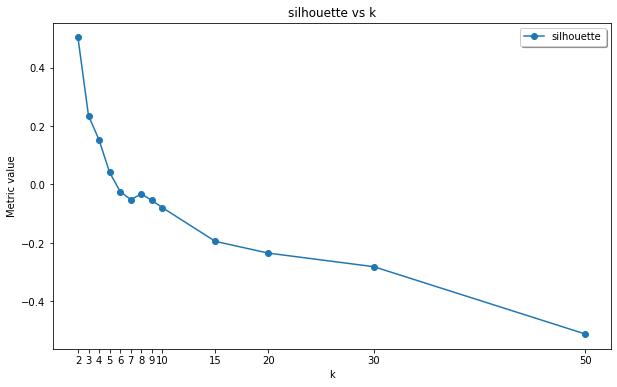

In [13]:
# silhouette
fig, g = plt.subplots(1, 1, figsize=size)
plt.xticks(ks, ks)
# plt.setp(g, xticks=ks, xticklabels=ks)
g.set_title("silhouette vs k")
g.set_ylabel('Metric value')
g.set_xlabel('k')
print(res[-1])
g.plot(ks, res[-1], label=labels[-1], marker='o')
g.legend(shadow=True, fancybox=True)

[0.63450182 0.47709329 0.57025138 0.46043142 0.44998216 0.41095259
 0.4031974  0.43322255 0.42621413 0.37407987 0.34431143 0.30664871
 0.29538266]


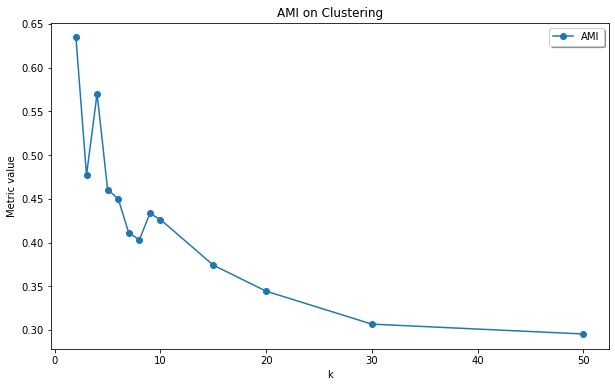

In [14]:
# AMI
fig, g = plt.subplots(1, 1, figsize=size)
# plt.setp(g, xticks=ks, xticklabels=ks)
g.set_title("AMI on Clustering")
g.set_ylabel('Metric value')
g.set_xlabel('k')
idx = -2
print(res[idx])
g.plot(ks, res[idx], label=labels[idx], marker='o')
g.legend(shadow=True, fancybox=True)


[0.62136299 0.57518557 0.74771284 0.73067837 0.75800257 0.76826297
 0.76171615 0.86030665 0.88678775 0.89131065 0.90509869 0.89633596
 0.99083884]
[0.64925027 0.40928518 0.46260116 0.33807406 0.32220555 0.28289168
 0.27707512 0.29230373 0.28356934 0.24098231 0.21785332 0.19268706
 0.18515777]
[0.63500059 0.47825683 0.57157536 0.46226496 0.45219551 0.41351708
 0.40634264 0.43635013 0.42972495 0.37938962 0.35117931 0.31718767
 0.31201027]
[0.73613628 0.572334   0.68429883 0.38686776 0.34951678 0.27562472
 0.26521583 0.2739208  0.23462996 0.16173862 0.12255433 0.08629355
 0.05747013]
[0.63450182 0.47709329 0.57025138 0.46043142 0.44998216 0.41095259
 0.4031974  0.43322255 0.42621413 0.37407987 0.34431143 0.30664871
 0.29538266]


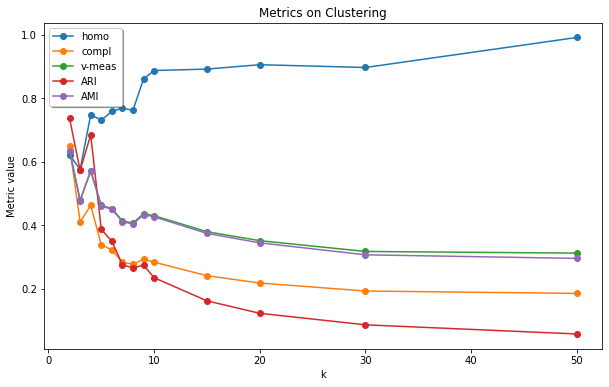

In [15]:
fig, g = plt.subplots(1, 1, figsize=size)
# plt.setp(g, xticks=ks, xticklabels=ks)
g.set_title("Metrics on Clustering")
g.set_ylabel('Metric value')
g.set_xlabel('k')
for idx in range(3, len(res)-1):
    print(res[idx])
    g.plot(ks, res[idx], label=labels[idx], marker='o')
    g.legend(shadow=True, fancybox=True)

# Analysis on the best k using Silhouette Method

In [16]:
clustering_steps = [
    ("standard_scaler", StandardScaler()),
    ("kmeans", KMeans(n_clusters=2))
]

clustering_pipeline = Pipeline(clustering_steps, verbose=True)
clustering_pipeline

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=2))],
         verbose=True)

In [17]:
estimated = clustering_pipeline.fit_predict(X)

[Pipeline] ... (step 1 of 2) Processing standard_scaler, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing kmeans, total=   0.0s


In [18]:
estimated.shape

(569,)

In [19]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'y'],
      dtype='object')

In [20]:
trues = np.sum(estimated == y)
print(trues)
print(trues/X.shape[0])

40
0.070298769771529


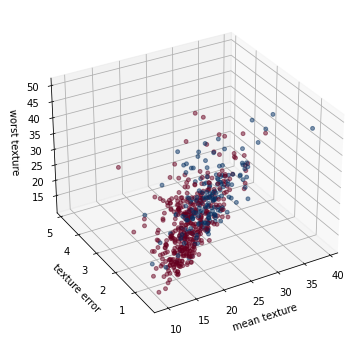

In [21]:
ticks = ['mean texture', 'texture error', 'worst texture']
# ticks = ['mean radius', 'mean concavity', 'mean fractal dimension']

fig = plt.figure()
fig.set_size_inches(size)
ax = plt.axes(projection='3d')
ax.scatter3D(X[ticks[0]], X[ticks[1]], X[ticks[2]],
             s=15, c=estimated, cmap='RdBu', alpha=0.5)
plt.xlabel(ticks[0])
plt.ylabel(ticks[1])
ax.set_zlabel(ticks[2])
ax.view_init(30, -120)

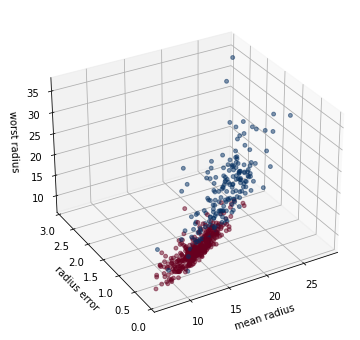

In [22]:
ticks = ['mean radius', 'radius error', 'worst radius']

fig = plt.figure()
fig.set_size_inches(size)
ax = plt.axes(projection='3d')
ax.scatter3D(X[ticks[0]], X[ticks[1]], X[ticks[2]],
             s=15, c=estimated, cmap='RdBu', alpha=0.5)
plt.xlabel(ticks[0])
plt.ylabel(ticks[1])
ax.set_zlabel(ticks[2])
ax.view_init(30, -120)




# Supervised

In [23]:
num_classes = 2

In [24]:
clustering_steps = [
    ("standard_scaler", StandardScaler()),
    ("kmeans", KMeans(n_clusters=num_classes))
]

clustering_pipeline = Pipeline(clustering_steps, verbose=True)
clustering_pipeline


Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=2))],
         verbose=True)

In [25]:
clustering_pipeline.fit(X)
estimated = clustering_pipeline.predict(X)
print("AMI:")
metrics.adjusted_mutual_info_score(y, clustering_pipeline[-1].labels_)

[Pipeline] ... (step 1 of 2) Processing standard_scaler, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing kmeans, total=   0.0s
AMI:


0.6345018205594044

In [26]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'y'],
      dtype='object')

D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have

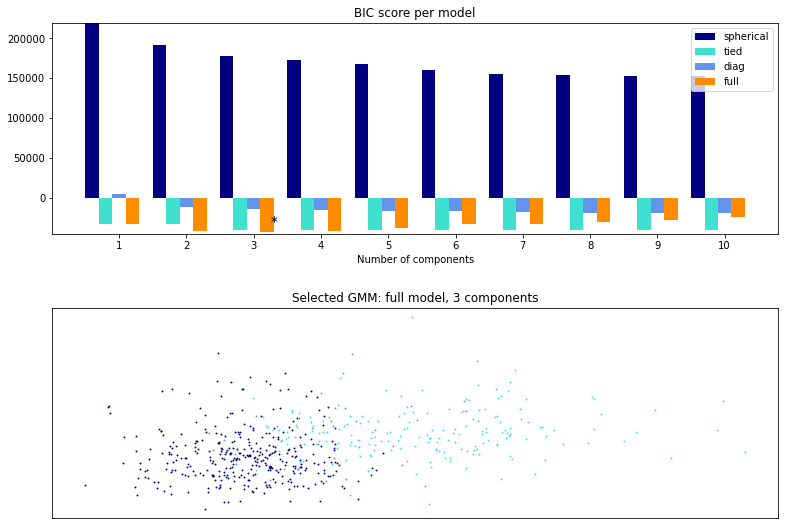

In [27]:
import itertools
import matplotlib as mpl
from scipy import linalg

lowest_bic = np.infty
bic = []
n_components_range = range(1, 11)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(
    ["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(13, 8))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range): (i + 1)
                * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(np.array(X)[Y_ == i, 0], np.array(X)
                [Y_ == i, 1], 0.8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()